In [50]:
%pip install pandas numpy seaborn matplotlib scikit-learn xgboost


[notice] A new release of pip is available: 23.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier

import pickle as pkl

import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler as Scaler
from sklearn.preprocessing import StandardScaler as StdScaler
# import hyperopt

from models import decision_tree, k_nearest, logistic_regression, random_forest, support_vector_cls, xgboost

In [86]:
# csv_file_names = ["pyradiomics_extraction_box_with_correct_mask.csv", "pyradiomics_extraction_box_without_correct_mask.csv", 
#              "pyradiomics_extraction_segmentation_maskcorrect.csv", "pyradiomics_extraction_segmentation_no_maskcorrect.csv"]

# FILE_INDEX = 3
# FILENAME = csv_file_names[FILE_INDEX].split('.')[0] +  '_with_preprocessing'
# RESULTS_PATH = f'Results_DemoGraphics/{FILENAME}.csv'

# CLASS_LABELS = '../../Data/Patient class labels.csv'
# DF_PATH = '../../Data/With Demographic Features/' + csv_file_names[FILE_INDEX]
# MODEL_PICKLING = f'Results_DemoGraphics/{FILENAME}.pkl'

In [10]:
SEED = 2454259

CRITERION = 'accuracy'
path = "../../Train Test Splits/New Split/"

In [88]:
# labels = pd.read_csv(CLASS_LABELS)
# features = pd.read_csv(DF_PATH).drop(columns = 'sequence', errors='ignore')
# total_features = pd.merge(features, labels, left_on = 'patient', right_on = 'Patient ID').drop(columns = ['Patient ID', 'patient'])
# total_features

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,Race and Ethnicity_5,Race and Ethnicity_6,Race and Ethnicity_7,Race and Ethnicity_8,Metastatic at Presentation (Outside of Lymph Nodes)_0,Metastatic at Presentation (Outside of Lymph Nodes)_1,ER,PR,HER2,Mol Subtype
0,0.807005,0.729780,23.614309,32.358102,36.073737,38.431136,39.309346,45.798426,11352.720350,26.113156,...,0,0,0,0,1,0,0,0,1,2
1,0.641558,0.577887,17.378564,30.072592,23.148662,29.852205,29.748492,33.784677,4051.005400,19.293327,...,0,0,0,0,1,0,0,0,0,3
2,0.756223,0.272616,13.050754,47.872295,40.488107,43.126056,56.606869,57.665740,11866.396190,36.202150,...,0,0,0,0,1,0,1,1,0,0
3,0.718139,0.610317,8.730117,14.304230,11.420813,14.972284,14.477716,16.540987,829.333325,10.272429,...,0,0,0,0,1,0,1,1,0,0
4,0.687760,0.436019,22.539193,51.693090,55.175581,49.674566,36.443449,58.274413,25572.814940,35.552459,...,1,0,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,0.886914,0.668151,28.553043,42.734408,45.886501,41.977361,51.383808,56.016573,28567.316540,37.901723,...,0,0,0,0,1,0,1,1,0,0
918,0.757419,0.596730,12.864613,21.558522,21.066007,20.543932,25.375225,27.268354,2558.161146,16.328835,...,0,0,0,0,1,0,1,1,0,0
919,0.872632,0.837806,15.199560,18.142097,19.038279,20.649190,20.505122,24.348411,2671.696974,15.831368,...,0,0,0,0,1,0,1,1,0,0
920,0.855874,0.735409,30.453436,41.410193,43.076382,45.448460,48.143552,54.398662,28568.303570,35.441921,...,0,0,0,0,1,0,1,1,0,0


## Train test split

In [37]:
er_train = pd.read_csv(path + "ER/train.csv")
er_test = pd.read_csv(path + "ER/test.csv")
er_val = pd.read_csv(path + "ER/val.csv")

pr_train = pd.read_csv(path + "PR/train.csv")
pr_test = pd.read_csv(path + "PR/test.csv")
pr_val = pd.read_csv(path + "PR/val.csv")

her2_train = pd.read_csv(path + "HER2/train.csv")
her2_test = pd.read_csv(path + "HER2/test.csv")
her2_val = pd.read_csv(path + "HER2/val.csv")

mol_subtype_train = pd.read_csv(path + "Mol_Subtype/train.csv")
mol_subtype_test = pd.read_csv(path + "Mol_Subtype/test.csv")
mol_subtype_val = pd.read_csv(path + "Mol_Subtype/val.csv")

In [38]:
train_x_er, train_y_er = er_train.drop(columns = ['label']), er_train['label']
test_x_er, test_y_er = er_test.drop(columns = ['label']), er_test['label']
val_x_er, val_y_er = er_val.drop(columns = ['label']), er_val['label']

train_x_pr, train_y_pr = pr_train.drop(columns = ['label']), pr_train['label']
test_x_pr, test_y_pr = pr_test.drop(columns = ['label']), pr_test['label']
val_x_pr, val_y_pr = pr_val.drop(columns = ['label']), pr_val['label']

train_x_her2, train_y_her2 = her2_train.drop(columns = ['label']), her2_train['label']
test_x_her2, test_y_her2 = her2_test.drop(columns = ['label']), her2_test['label']
val_x_her2, val_y_her2 = her2_val.drop(columns = ['label']), her2_val['label']

train_x_mol_subtype, train_y_mol_subtype = mol_subtype_train.drop(columns = ['label']), mol_subtype_train['label']
test_x_mol_subtype, test_y_mol_subtype = mol_subtype_test.drop(columns = ['label']), mol_subtype_test['label']
val_x_mol_subtype, val_y_mol_subtype = mol_subtype_val.drop(columns = ['label']), mol_subtype_val['label']

Feature scaling - on all three datasets;    
Feature Engineering - on training+validation only;      
Resampling - on training only

## Resampling

### Imbalanced Data

In [90]:
# # splitting the dataset for training, testing, validating on ER subtype
# train_x_er, train_y_er = train_df.drop(columns = ['ER']), train_df['ER']
# val_x_er, val_y_er = val_df.drop(columns = ['ER']), val_df['ER']
# test_x_er, test_y_er = test_df.drop(columns = ['ER']), test_df['ER']

# # splitting the dataset for training, testing, validating on PR subtyp
# train_x_pr, train_y_pr = train_df.drop(columns = ['PR']), train_df['PR']
# val_x_pr, val_y_pr = val_df.drop(columns = ['PR']), val_df['PR']
# test_x_pr, test_y_pr = test_df.drop(columns = ['PR']), test_df['PR']

# # splitting the dataset for training, testing, validating on HER2 subtype
# train_x_her2, train_y_her2 = train_df.drop(columns = ['HER2']), train_df['HER2']
# val_x_her2, val_y_her2 = val_df.drop(columns = ['HER2']), val_df['HER2']
# test_x_her2, test_y_her2 = test_df.drop(columns = ['HER2']), test_df['HER2']

# # splitting the dataset for training, testing, validating on molecular subtype
# train_x_mol_subtype, train_y_mol_subtype = train_df.drop(columns = ['Mol Subtype']), train_df['Mol Subtype']
# val_x_mol_subtype, val_y_mol_subtype = val_df.drop(columns = ['Mol Subtype']), val_df['Mol Subtype']
# test_x_mol_subtype, test_y_mol_subtype = test_df.drop(columns = ['Mol Subtype']), test_df['Mol Subtype']

In [15]:
# train_df['ER'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
# plt.show()
# train_df['PR'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
# plt.show()
# train_df['HER2'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
# plt.show()
# train_df['Mol Subtype'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
# plt.show()

In [39]:
print("Train:", len(train_x_er), ", Val:", len(val_x_er), ", Test:", len(test_x_er))
dist = pd.DataFrame({'ER+': [train_y_er.value_counts()[0], val_y_er.value_counts()[0], test_y_er.value_counts()[0]],
                     'ER-': [train_y_er.value_counts()[1], val_y_er.value_counts()[1], test_y_er.value_counts()[1]],
                     'PR+': [train_y_pr.value_counts()[0], val_y_pr.value_counts()[0], test_y_pr.value_counts()[0]],
                     'PR-': [train_y_pr.value_counts()[1], val_y_pr.value_counts()[1], test_y_pr.value_counts()[1]],
                     'HER2+': [train_y_her2.value_counts()[0], val_y_her2.value_counts()[0], test_y_her2.value_counts()[0]],
                     'HER2-': [train_y_her2.value_counts()[1], val_y_her2.value_counts()[1], test_y_her2.value_counts()[1]],
                     'Mol Subtype (0)': [train_y_mol_subtype.value_counts()[0], val_y_mol_subtype.value_counts()[0], test_y_mol_subtype.value_counts()[0]],
                     'Mol Subtype (1)': [train_y_mol_subtype.value_counts()[1], val_y_mol_subtype.value_counts()[1], test_y_mol_subtype.value_counts()[1]],
                     'Mol Subtype (2)': [train_y_mol_subtype.value_counts()[2], val_y_mol_subtype.value_counts()[2], test_y_mol_subtype.value_counts()[2]],
                     'Mol Subtype (3)': [train_y_mol_subtype.value_counts()[3], val_y_mol_subtype.value_counts()[3], test_y_mol_subtype.value_counts()[3]]},
                     index = ['Train', 'Val', 'Test'])
dist

Train: 553 , Val: 184 , Test: 185


,ER+,ER-,PR+,PR-,HER2+,HER2-,Mol Subtype (0),Mol Subtype (1),Mol Subtype (2),Mol Subtype (3)
Train,142,411,194,359,455,98,357,62,36,98
Val,47,137,65,119,152,32,119,21,11,33
Test,47,138,65,120,152,33,119,21,12,33


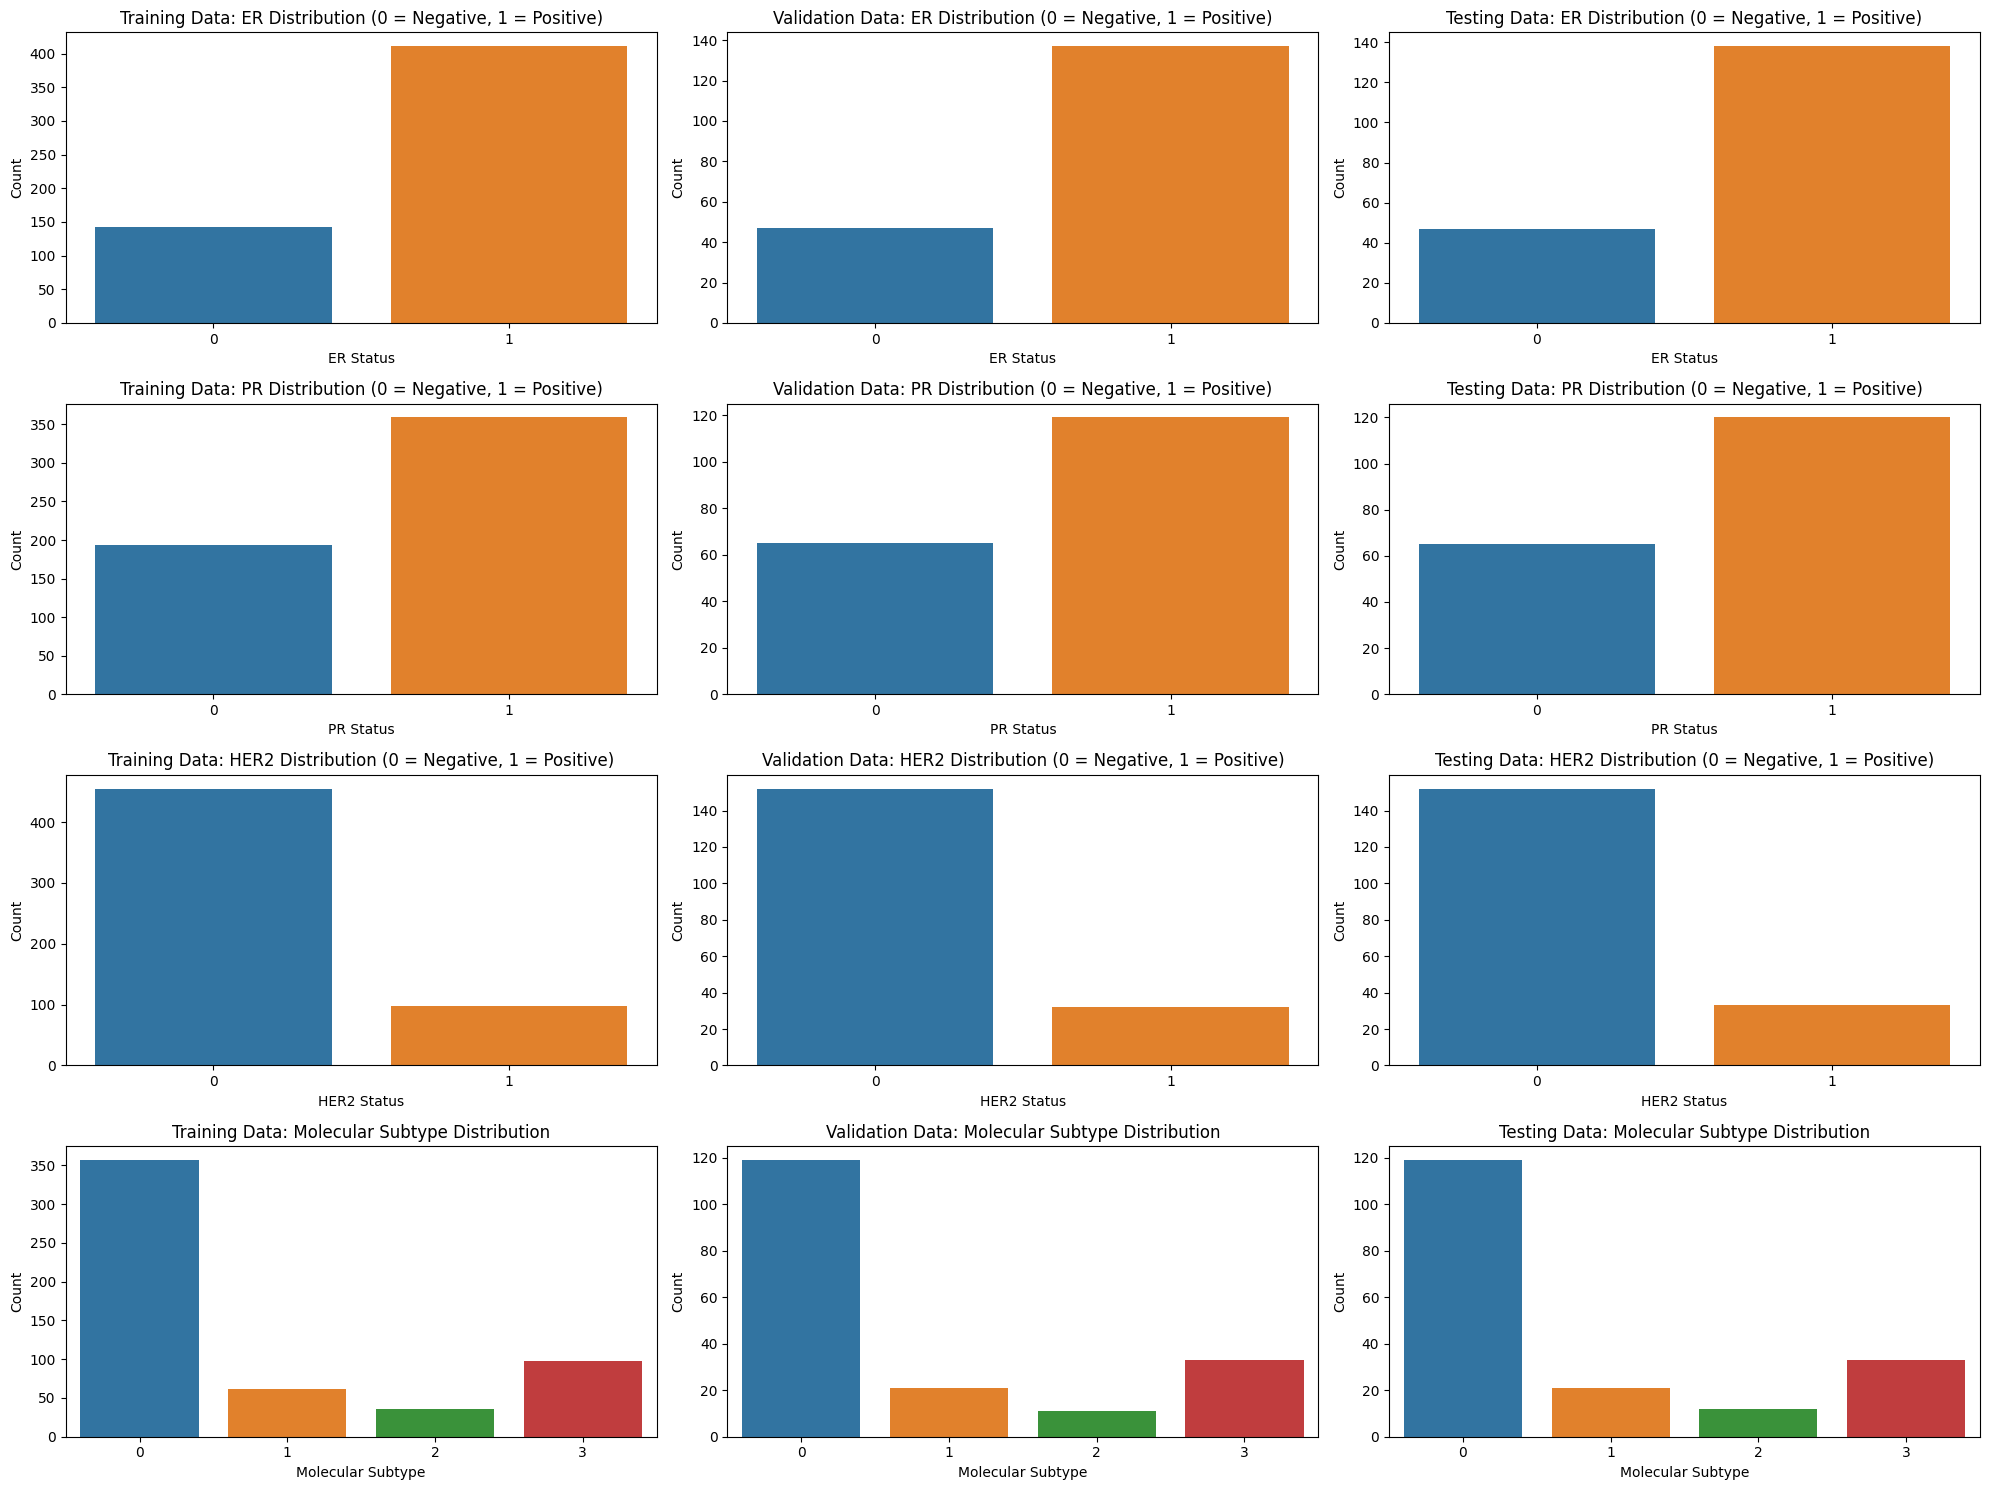

In [17]:
# # creating multiple subplots of graph to visualise the above data 
# fig, axes = plt.subplots(4, 3, figsize=(20, 15))
# plot_data = [[train_y_er, val_y_er, test_y_er], [train_y_pr, val_y_pr, test_y_pr], [train_y_her2, val_y_her2, test_y_her2], [train_y_mol_subtype, val_y_mol_subtype, test_y_mol_subtype]]
# for i in range(4):
#     for j in range(3):
#         sns.countplot(x=plot_data[i][j], ax=axes[i][j])
#         if i == 0:
#             axes[i][j].set_xlabel('ER Status')
#             if j == 0:
#                 axes[i][j].set_title('Training Data: ER Distribution (0 = Negative, 1 = Positive)')
#             elif j == 1:
#                 axes[i][j].set_title('Validation Data: ER Distribution (0 = Negative, 1 = Positive)')
#             else:
#                 axes[i][j].set_title('Testing Data: ER Distribution (0 = Negative, 1 = Positive)')
        
#         elif i == 1:
#             axes[i][j].set_xlabel('PR Status')
#             if j == 0:
#                 axes[i][j].set_title('Training Data: PR Distribution (0 = Negative, 1 = Positive)')
#             elif j == 1:
#                 axes[i][j].set_title('Validation Data: PR Distribution (0 = Negative, 1 = Positive)')
#             else:
#                 axes[i][j].set_title('Testing Data: PR Distribution (0 = Negative, 1 = Positive)')
        
#         elif i == 2:
#             axes[i][j].set_xlabel('HER2 Status')
#             if j == 0:
#                 axes[i][j].set_title('Training Data: HER2 Distribution (0 = Negative, 1 = Positive)')
#             elif j == 1:
#                 axes[i][j].set_title('Validation Data: HER2 Distribution (0 = Negative, 1 = Positive)')
#             else:
#                 axes[i][j].set_title('Testing Data: HER2 Distribution (0 = Negative, 1 = Positive)')
        
#         else:
#             axes[i][j].set_xlabel('Molecular Subtype')
#             if j == 0:
#                 axes[i][j].set_title('Training Data: Molecular Subtype Distribution')
#             elif j == 1:
#                 axes[i][j].set_title('Validation Data: Molecular Subtype Distribution')
#             else:
#                 axes[i][j].set_title('Testing Data: Molecular Subtype Distribution')

#         axes[i][j].set_ylabel('Count')

# plt.tight_layout()
# plt.show()

### Resampling for Training Samples

In [18]:
# Resampling the training data to balance the dataset using SMOTE

from imblearn.over_sampling import SMOTE

def resample_data_smote(x, y):
    sm = SMOTE(random_state = SEED)
    x_res, y_res = sm.fit_resample(x, y)
    return x_res, y_res

train_x_er_sam, train_y_er_sam = resample_data_smote(train_x_er, train_y_er)
# train_x_pr_sam, train_y_pr_sam = resample_data_smote(train_x_pr, train_y_pr)
train_x_her2_sam, train_y_her2_sam = resample_data_smote(train_x_her2, train_y_her2)
# train_x_mol_subtype_sam, train_y_mol_subtype_sam = resample_data_smote(train_x_mol_subtype, train_y_mol_subtype)

In [19]:
train_x_er = train_x_er_sam.copy()
train_y_er = train_y_er_sam.copy()

# train_x_pr = train_x_pr_sam.copy()
# train_y_pr = train_y_pr_sam.copy()

train_x_her2 = train_x_her2_sam.copy()
train_y_her2 = train_y_her2_sam.copy()

# train_x_mol_subtype = train_x_mol_subtype_sam.copy()
# train_y_mol_subtype = train_y_mol_subtype_sam.copy()

print(train_x_er.shape, train_y_er.shape)
print(train_x_pr.shape, train_y_pr.shape)
print(train_x_her2.shape, train_y_her2.shape)
print(train_x_mol_subtype.shape, train_y_mol_subtype.shape)

(822, 107) (822,)
(553, 107) (553,)
(910, 107) (910,)
(553, 107) (553,)


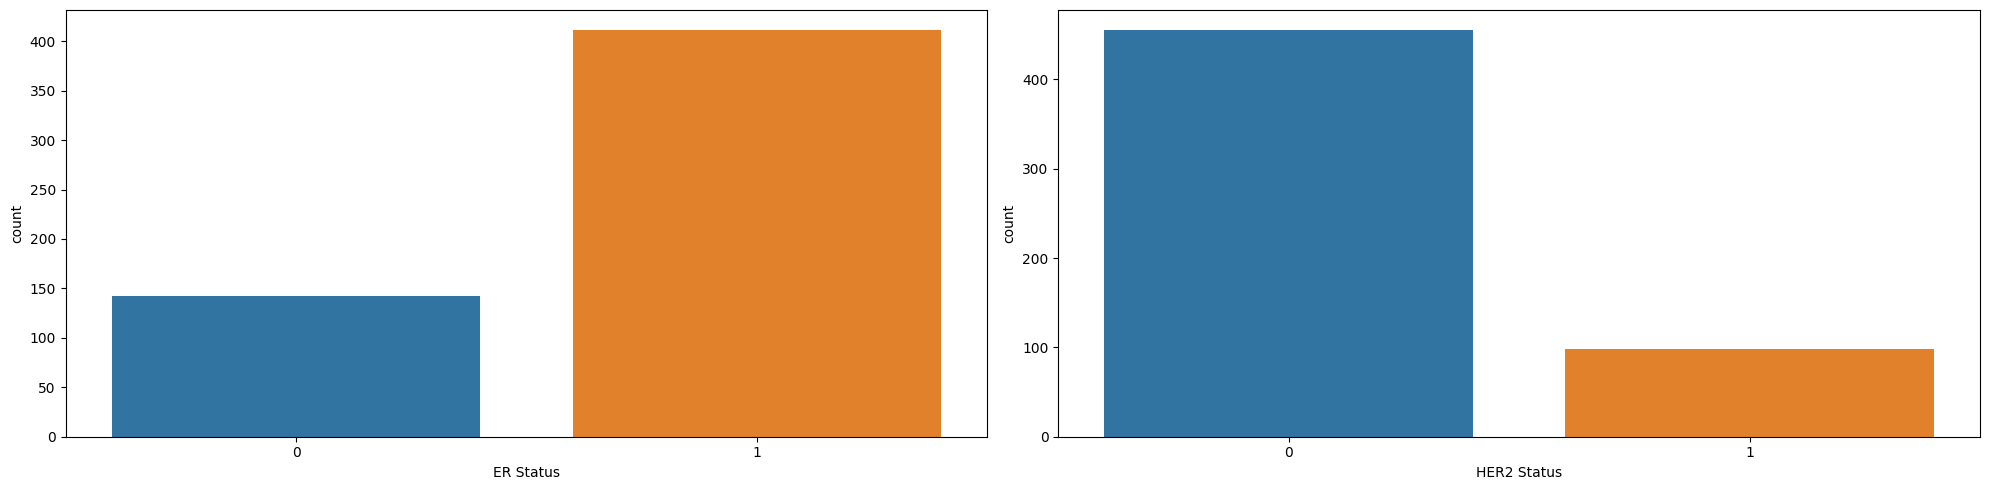

In [40]:
# Plotting the distribution of the resampled data

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(x=train_y_er, ax=axes[0])
axes[0].set_xlabel('ER Status')

sns.countplot(x=train_y_her2, ax=axes[1])
axes[1].set_xlabel('HER2 Status')

plt.tight_layout()
plt.show()

## Fitting models

In [41]:
classifications_classes = {
    'ER' : (train_x_er, train_y_er, val_x_er, val_y_er, test_x_er, test_y_er),
    'PR' : (train_x_pr, train_y_pr, val_x_pr, val_y_pr, test_x_pr, test_y_pr),
    'HER2': (train_x_her2, train_y_her2, val_x_her2, val_y_her2, test_x_her2, test_y_her2),
    'Mol Subtype': (train_x_mol_subtype, train_y_mol_subtype, val_x_mol_subtype, val_y_mol_subtype, test_x_mol_subtype, test_y_mol_subtype)
}

In [42]:
def get_metrics(model, x, truey, split):
    pred_y = model.predict(x)
    acc = accuracy_score(truey, pred_y)
    prec = precision_score(truey, pred_y, average = 'weighted')
    rec = recall_score(truey, pred_y, average = 'weighted')
    f1 = f1_score(truey, pred_y, average = 'weighted')

    return {f'{split}_acc': acc, f'{split}_prec': prec, f'{split}_rec': rec, f'{split}_f1': f1}


In [43]:
def get_NB_model(tx, ty, vx, vy, testx, testy, classification = None):
    nb = GaussianNB()
    nb.fit(tx, ty)
    
    train_metrics = get_metrics(nb, tx, ty, 'train')
    val_metrics = get_metrics(nb, vx, vy, 'val')
    test_metrics = get_metrics(nb, testx, testy, 'test')

    combined_metrics = {**train_metrics, **val_metrics, **test_metrics}

    result = pd.DataFrame(combined_metrics, index = [0])
    result['Algorithm'] = 'Naive Bayes'
    if classification is not None:
        result['classification'] = classification

    return result, nb

def get_DT_model(tx, ty, vx, vy, testx, testy, criterion = 'accuracy', classification = None):
    '''Get Decision Tree model with metrics'''
    model = decision_tree.get_best_hyperparameters(tx, ty, vx, vy, criterion = criterion)

    train_metrics = get_metrics(model, tx, ty, 'train')
    val_metrics = get_metrics(model, vx, vy, 'val')
    test_metrics = get_metrics(model, testx, testy, 'test')

    combined_metrics = {**train_metrics, **val_metrics, **test_metrics}

    result = pd.DataFrame(combined_metrics, index = [0])
    result['Algorithm'] = 'Decision Tree'
    if classification is not None:
        result['classification'] = classification

    return result, model

def get_KNN_model(tx, ty, vx, vy, testx, testy, criterion = 'accuracy', classification = None):
    '''Get KNN model with metrics'''
    model = k_nearest.get_best_hyperparameters(tx, ty, vx, vy, criterion = criterion)

    train_metrics = get_metrics(model, tx, ty, 'train')
    val_metrics = get_metrics(model, vx, vy, 'val')
    test_metrics = get_metrics(model, testx, testy, 'test')

    combined_metrics = {**train_metrics, **val_metrics, **test_metrics}

    result = pd.DataFrame(combined_metrics, index = [0])
    result['Algorithm'] = 'KNN'
    if classification is not None:
        result['classification'] = classification

    return result, model

def get_LR_model(tx, ty, vx, vy, testx, testy, criterion = 'accuracy', classification = None):
    '''Get Logistic Regression model with metrics'''
    model = logistic_regression.get_best_hyperparameters(tx, ty, vx, vy, criterion = criterion)

    train_metrics = get_metrics(model, tx, ty, 'train')
    val_metrics = get_metrics(model, vx, vy, 'val')
    test_metrics = get_metrics(model, testx, testy, 'test')

    combined_metrics = {**train_metrics, **val_metrics, **test_metrics}

    result = pd.DataFrame(combined_metrics, index = [0])
    result['Algorithm'] = 'Logistic Regression'
    if classification is not None:
        result['classification'] = classification

    return result, model

def get_RF_model(tx, ty, vx, vy, testx, testy, criterion = 'accuracy', classification = None):
    '''Get Random forest model with metrics'''
    model = random_forest.get_best_hyperparameters(tx, ty, vx, vy, criterion = criterion)

    train_metrics = get_metrics(model, tx, ty, 'train')
    val_metrics = get_metrics(model, vx, vy, 'val')
    test_metrics = get_metrics(model, testx, testy, 'test')

    combined_metrics = {**train_metrics, **val_metrics, **test_metrics}

    result = pd.DataFrame(combined_metrics, index = [0])
    result['Algorithm'] = 'Random Forest'
    if classification is not None:
        result['classification'] = classification

    return result, model

def get_SVM_model(tx, ty, vx, vy, testx, testy, criterion = 'accuracy', classification = None):
    '''Get SVM model with metrics'''
    model = support_vector_cls.get_best_hyperparameters(tx, ty, vx, vy, criterion = criterion)

    train_metrics = get_metrics(model, tx, ty, 'train')
    val_metrics = get_metrics(model, vx, vy, 'val')
    test_metrics = get_metrics(model, testx, testy, 'test')

    combined_metrics = {**train_metrics, **val_metrics, **test_metrics}

    result = pd.DataFrame(combined_metrics, index = [0])
    result['Algorithm'] = 'SVM'
    if classification is not None:
        result['classification'] = classification

    return result, model
    
def get_XGB_model(tx, ty, vx, vy, testx, testy, criterion = 'accuracy', classification = None):
    '''Get XGBoost model with metrics'''
    model = xgboost.get_best_hyperparameters(tx, ty, vx, vy, criterion = criterion)

    train_metrics = get_metrics(model, tx, ty, 'train')
    val_metrics = get_metrics(model, vx, vy, 'val')
    test_metrics = get_metrics(model, testx, testy, 'test')

    combined_metrics = {**train_metrics, **val_metrics, **train_metrics}

    result = pd.DataFrame(combined_metrics, index = [0])
    result['Algorithm'] = 'XGBoost'
    if classification is not None:
        result['classification'] = classification

    return result, model

In [53]:
classification_results = pd.DataFrame()
models = {}


from sklearn.decomposition import PCA

for key, value in classifications_classes.items():

   tx, ty, vx, vy, testx, testy = value
    
   # Applying Feature Scaling to the data using the Standard Scaler
   scaler = StdScaler()
   tx = scaler.fit_transform(tx)
   vx = scaler.transform(vx)
   testx = scaler.transform(testx)

   # Applying Principal Component Analysis to the data

   # pca = PCA(n_components = 'mle', svd_solver = 'full')
   # tx = pca.fit_transform(tx)
   # vx = pca.transform(vx)
   # testx = pca.transform(testx)

   
   res_nb, nb = get_NB_model(tx, ty, vx, vy, testx, testy, classification = key)
   res_dt, dt = get_DT_model(tx, ty, vx, vy, testx, testy, criterion = CRITERION, classification = key)
   res_knn, knn = get_KNN_model(tx, ty, vx, vy, testx, testy, criterion = CRITERION, classification = key)
   res_lr, lr = get_LR_model(tx, ty, vx, vy, testx, testy, criterion = CRITERION, classification = key)
   res_rf, rf = get_RF_model(tx, ty, vx, vy, testx, testy, criterion = CRITERION, classification = key)
   res_svm, svm = get_SVM_model(tx, ty, vx, vy, testx, testy, criterion = CRITERION, classification = key)
   res_xgb, xgb = get_XGB_model(tx, ty, vx, vy, testx, testy, criterion = CRITERION, classification = key)

   models[key] = {'Naive Bayes' : nb,
                  'Decision Trees' : dt,
                  'K Nearest Neighbours': knn,
                  'Logistic Regression' : lr,
                  'Random Forest' : rf,
                  'SVM': svm,
                  'XGBoost': xgb}

   classification_results = pd.concat([classification_results,
                                       res_nb,
                                       res_dt,
                                       res_knn,
                                       res_lr,
                                       res_rf,
                                       res_svm,
                                       res_xgb])

c:\Users\MOHD SUFYAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MOHD SUFYAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\MOHD SUFYAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\MOHD SUFYAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the 

In [57]:
classification_results

,train_acc,train_prec,train_rec,train_f1,val_acc,val_prec,val_rec,val_f1,test_acc,test_prec,test_rec,test_f1,Algorithm,classification
0,0.258590,0.490067,0.258590,0.117982,0.250000,0.064208,0.250000,0.102174,0.254054,0.064543,0.254054,0.102936,Naive Bayes,ER
0,0.779385,0.810008,0.779385,0.714821,0.788043,0.835011,0.788043,0.726100,0.718919,0.626603,0.718919,0.647903,Decision Tree,ER
0,0.748644,0.711235,0.748644,0.666429,0.744565,0.690372,0.744565,0.669916,0.740541,0.670435,0.740541,0.660866,KNN,ER
0,0.752260,0.724463,0.752260,0.673750,0.760870,0.770051,0.760870,0.680189,0.729730,0.644144,0.729730,0.654385,Logistic Regression,ER
0,0.820976,0.855728,0.820976,0.782697,0.831522,0.862610,0.831522,0.798633,0.745946,0.689612,0.745946,0.664109,Random Forest,ER
0,0.757685,0.817264,0.757685,0.666434,0.755435,0.815904,0.755435,0.660384,0.735135,0.619882,0.735135,0.641328,SVM,ER
0,0.830018,0.861658,0.830018,0.796692,0.847826,0.873650,0.847826,0.822601,NaN,NaN,NaN,NaN,XGBoost,ER
0,0.372514,0.611565,0.372514,0.243463,0.358696,0.493306,0.358696,0.222073,0.372973,0.774825,0.372973,0.227522,Naive Bayes,PR
0,0.728752,0.741768,0.728752,0.689776,0.750000,0.782704,0.750000,0.712430,0.632432,0.581190,0.632432,0.572089,Decision Tree,PR
0,0.707052,0.695372,0.707052,0.681921,0.722826,0.721941,0.722826,0.692554,0.632432,0.589935,0.632432,0.586019,KNN,PR


In [61]:
classification_results.to_csv("Results/holdout_StdScaler.csv", index = False)

In [ ]:
# Do it without resampling, and with Standard Scaler instead of MinMaxScaler.
# Prepare six sets of results -
# PCA with resampling and Standard Scaler
# PCA with resampling and MinMaxScaler
# PCA with holdout set and Standard Scaler
# PCA with holdout set and MinMaxScaler
# No PCA with holdout set and Standard Scaler
# No PCA with holdout set and MinMaxScaler

In [ ]:
# RESULTS_PATH = f'Results_NoResample/55_15_30_Scaling_PCA_{FILENAME}.csv'

# MODEL_PICKLING = f'Results_NoResample/55_15_30_Models_Scaling_PCA_{FILENAME}.pkl'

cols = classification_results.columns.tolist()
cols = cols[-2:] + cols[:-2]
classification_results = classification_results[cols]

classification_results.to_csv(RESULTS_PATH, index = False)

with open(MODEL_PICKLING, 'wb') as file:
    pkl.dump(models, file)